In [1]:
import pandas as pd

# Collect data from USGS
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())
print(data.info())

# Save the dataset
file_path = 'earthquakes_all_month.csv'
data.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")

                       time   latitude   longitude  depth   mag magType   nst  \
0  2024-06-27T10:58:00.490Z  19.377501 -155.218002   1.68  2.25      md  35.0   
1  2024-06-27T10:53:21.220Z  19.388834 -155.250839   1.25  1.98      ml  32.0   
2  2024-06-27T10:42:02.720Z  -6.488700  149.422800  22.86  5.20      mb  46.0   
3  2024-06-27T10:35:57.869Z  37.058600 -117.475100   2.40  0.90      ml  10.0   
4  2024-06-27T10:33:52.920Z  19.379833 -155.241501   1.89  2.08      ml  33.0   

      gap      dmin     rms  ...                   updated  \
0   81.00  0.004387  0.2300  ...  2024-06-27T10:59:53.270Z   
1   42.00  0.003336  0.2200  ...  2024-06-27T10:56:00.540Z   
2  126.00  3.663000  1.3700  ...  2024-06-27T10:58:21.040Z   
3  196.38  0.107000  0.4805  ...  2024-06-27T10:38:21.818Z   
4   70.00  0.006289  0.1800  ...  2024-06-27T10:36:30.620Z   

                                     place        type horizontalError  \
0              7 km SSE of Volcano, Hawaii  earthquake            

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select relevant columns and drop rows with missing values
data = data[['latitude', 'longitude', 'depth', 'mag']].dropna()

# Standardize numerical features
scaler = StandardScaler()
data[['latitude', 'longitude', 'depth']] = scaler.fit_transform(data[['latitude', 'longitude', 'depth']])

# Define features and target variable
X = data[['latitude', 'longitude', 'depth']]
y = data['mag']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression - Mean Squared Error: 0.02
Logistic Regression - R2 Score: 0.78


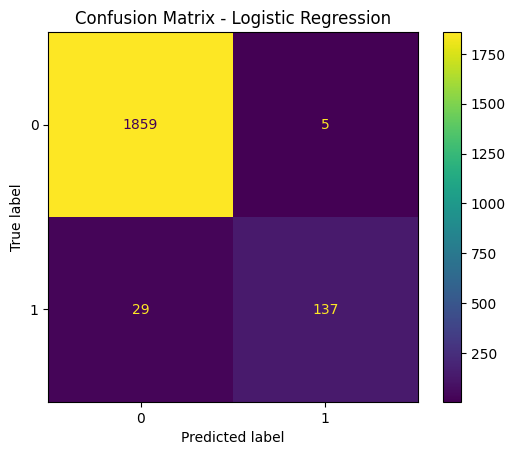

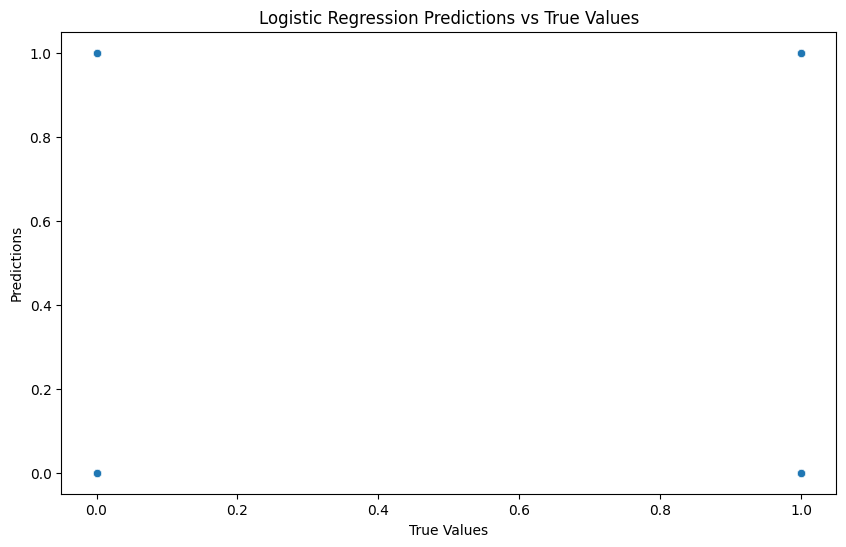

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Convert magnitude to a binary classification problem
y_train_binary = (y_train >= 4).astype(int)
y_test_binary = (y_test >= 4).astype(int)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_binary)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
mse_logistic = mean_squared_error(y_test_binary, y_pred_logistic)
r2_logistic = r2_score(y_test_binary, y_pred_logistic)

print(f'Logistic Regression - Mean Squared Error: {mse_logistic:.2f}')
print(f'Logistic Regression - R2 Score: {r2_logistic:.2f}')

# Plot confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_binary, y=y_pred_logistic)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Logistic Regression Predictions vs True Values')
plt.show()

Decision Tree - Mean Squared Error: 0.43
Decision Tree - R2 Score: 0.71


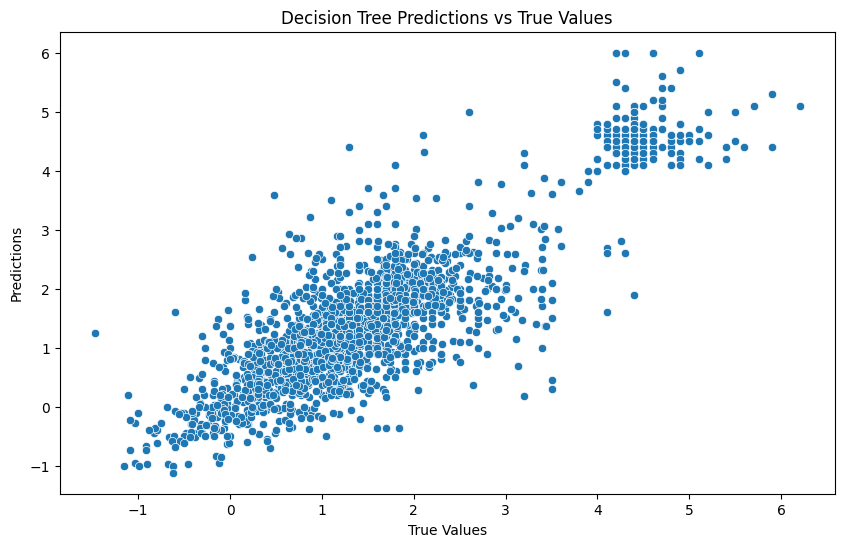

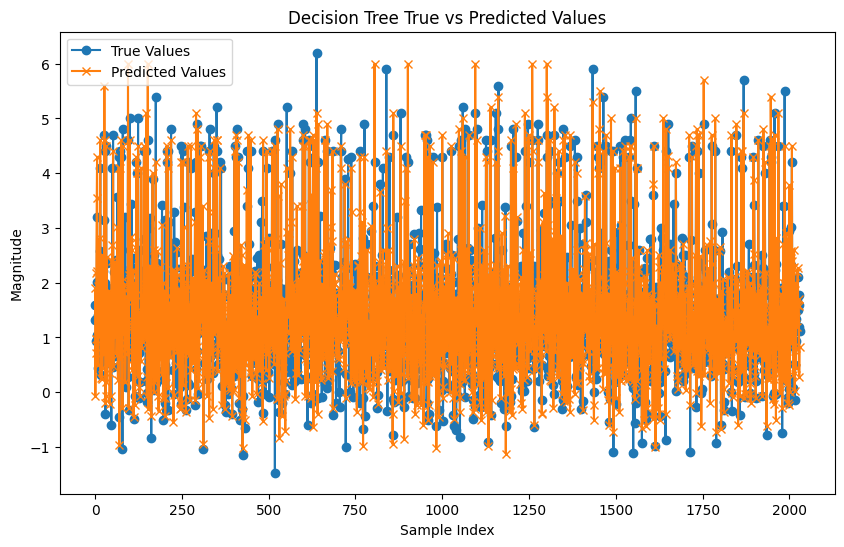

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree:.2f}')
print(f'Decision Tree - R2 Score: {r2_tree:.2f}')

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Predictions vs True Values')
plt.show()

# Plot true values vs. predicted values in line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(y_test)), y_pred_tree, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('Decision Tree True vs Predicted Values')
plt.legend()
plt.show()

Random Forest - Mean Squared Error: 0.26
Random Forest - R2 Score: 0.82


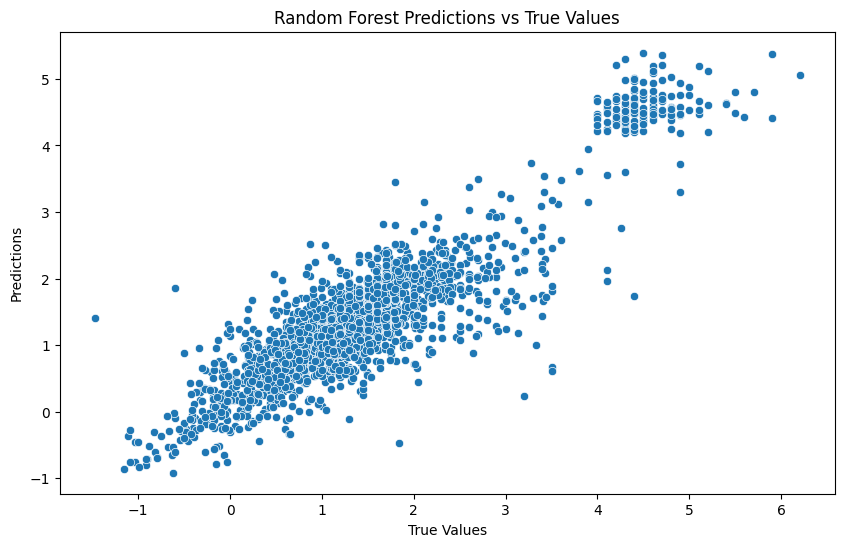

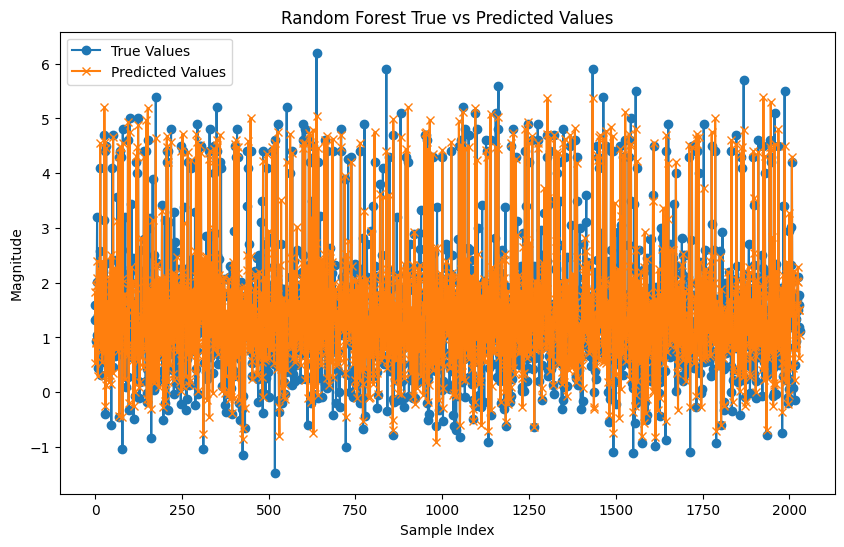

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest - Mean Squared Error: {mse_forest:.2f}')
print(f'Random Forest - R2 Score: {r2_forest:.2f}')

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Predictions vs True Values')
plt.show()

# Plot true values vs. predicted values in line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(y_test)), y_pred_forest, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('Random Forest True vs Predicted Values')
plt.legend()
plt.show()

Gradient Boosting - Mean Squared Error: 0.31
Gradient Boosting - R2 Score: 0.79


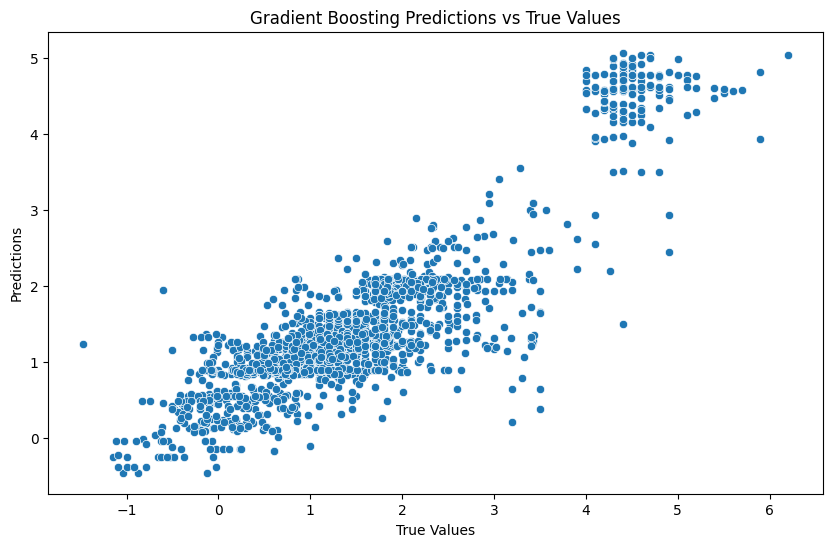

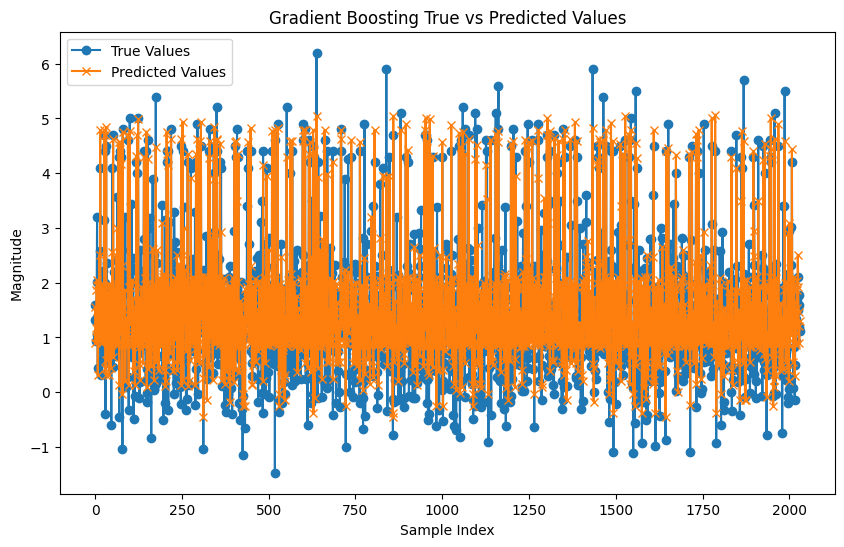

In [7]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'Gradient Boosting - Mean Squared Error: {mse_gbm:.2f}')
print(f'Gradient Boosting - R2 Score: {r2_gbm:.2f}')

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbm)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Predictions vs True Values')
plt.show()

# Plot true values vs. predicted values in line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(y_test)), y_pred_gbm, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('Gradient Boosting True vs Predicted Values')
plt.legend()
plt.show()

SVM - Mean Squared Error: 0.43
SVM - R2 Score: 0.71


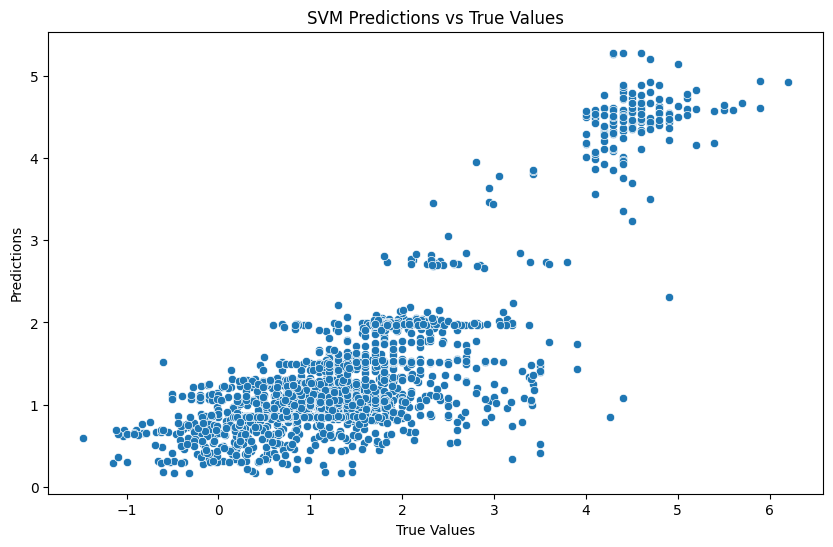

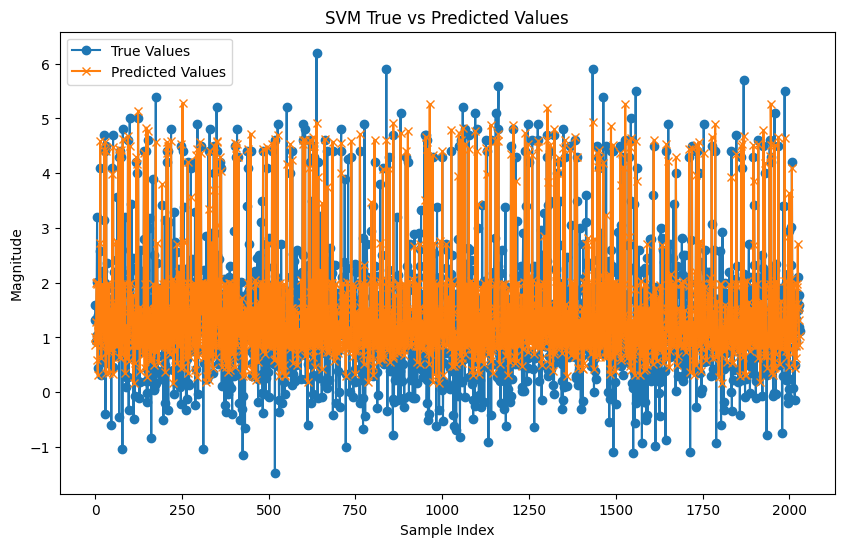

In [8]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM - Mean Squared Error: {mse_svm:.2f}')
print(f'SVM - R2 Score: {r2_svm:.2f}')

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svm)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVM Predictions vs True Values')
plt.show()

# Plot true values vs. predicted values in line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(y_test)), y_pred_svm, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('SVM True vs Predicted Values')
plt.legend()
plt.show()

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1645
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6395
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5677
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5453
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5113
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4877
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4707
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4699
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4569
Epoch 10/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4508
Epoch 11/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4668
Epoch 12/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4386
Epoch 13/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4341
Epoch 14/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4389
Epoch 15/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

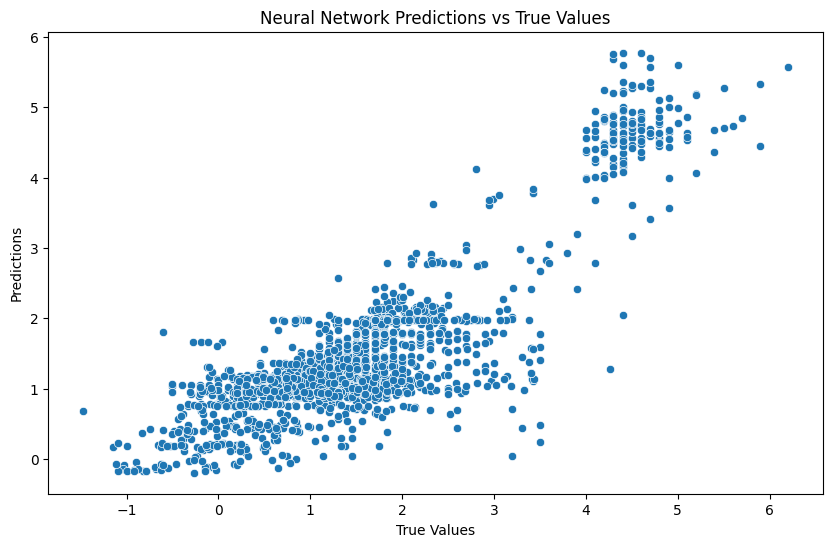

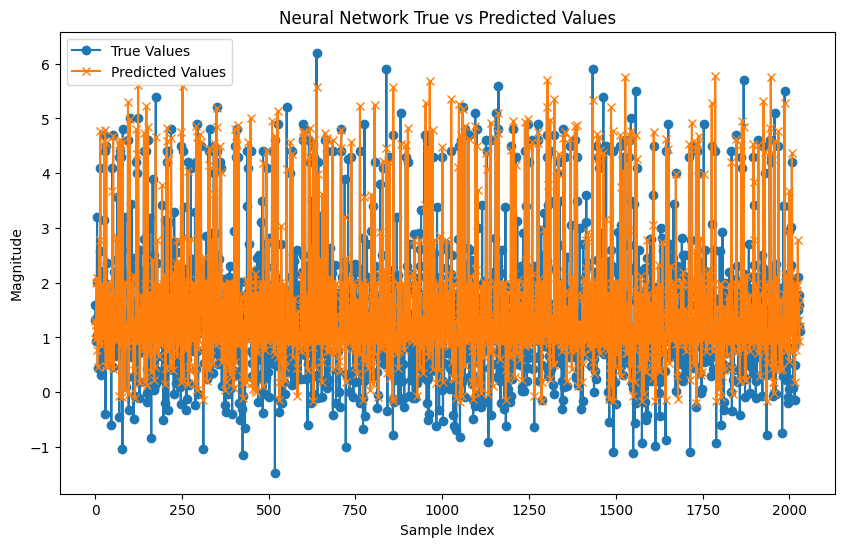

In [9]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - Mean Squared Error: {mse_nn:.2f}')
print(f'Neural Network - R2 Score: {r2_nn:.2f}')

# Plot prediction results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_nn.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Neural Network Predictions vs True Values')
plt.show()

# Plot true values vs. predicted values in line graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(y_test)), y_pred_nn.flatten(), label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('Neural Network True vs Predicted Values')
plt.legend()
plt.show()

                 Model  Mean Squared Error  R2 Score
0  Logistic Regression            0.016749  0.776940
1        Decision Tree            0.432765  0.705375
2        Random Forest            0.259584  0.823276
3    Gradient Boosting            0.308219  0.790166
4                  SVM            0.432421  0.705609
5       Neural Network            0.375607  0.744288


C:\Users\MRK Usafzai\AppData\Local\Temp\ipykernel_13100\870273073.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')


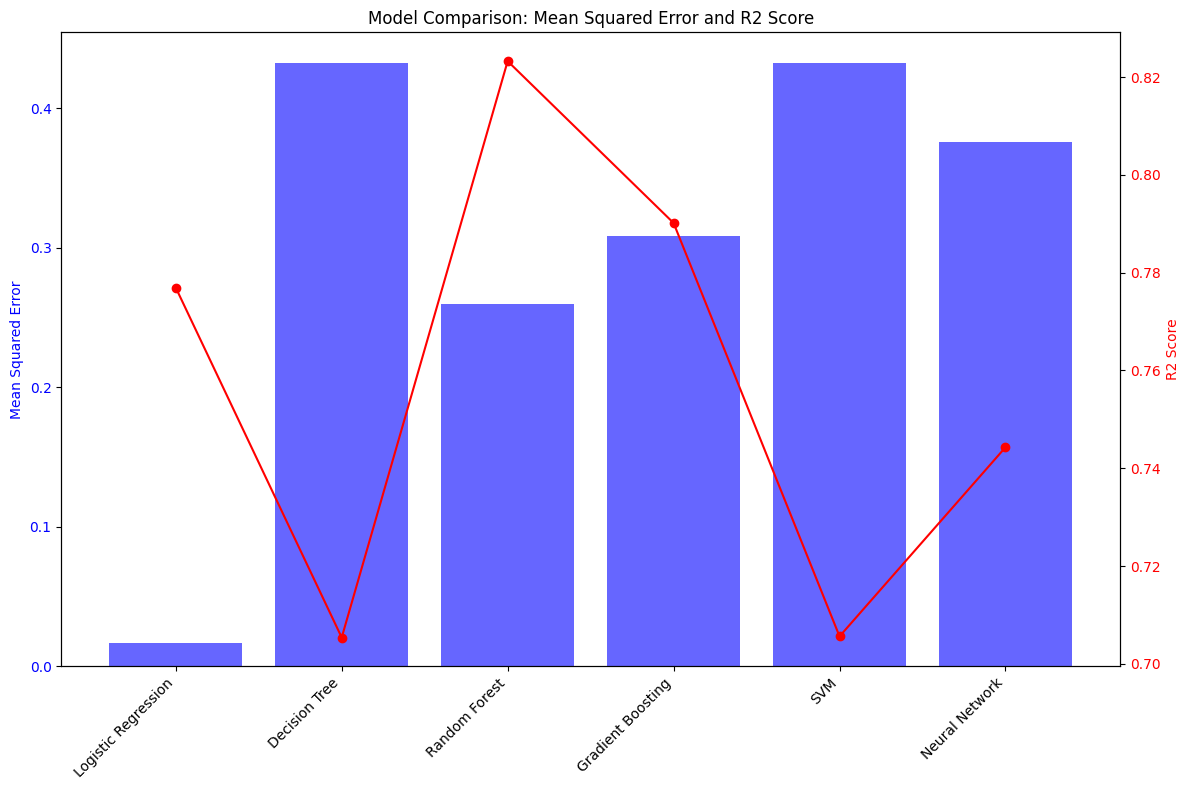

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming all previous MSE and R2 values are already calculated
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network'],
    'Mean Squared Error': [mse_logistic, mse_tree, mse_forest, mse_gbm, mse_svm, mse_nn],
    'R2 Score': [r2_logistic, r2_tree, r2_forest, r2_gbm, r2_svm, r2_nn]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Mean Squared Error
ax1.bar(results_df['Model'], results_df['Mean Squared Error'], color='b', alpha=0.6, label='Mean Squared Error')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for R2 Score
ax2 = ax1.twinx()
ax2.plot(results_df['Model'], results_df['R2 Score'], color='r', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and labels
plt.title('Model Comparison: Mean Squared Error and R2 Score')
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Show the plot
fig.tight_layout()
plt.show()